In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sns
%matplotlib inline

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.utils import shuffle

In [3]:
# Load Dataset with all columns
# Making the data columns datetime objects with the parse_dates attribute
bikeshare_full = pd.read_csv('/Users/matthewcassi/Documents/Bike-Sharing-Dataset/less_bikeshare_lat_lon.csv', 
                        parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])
# Removing the Unnamed column
bikeshare_full.drop('Unnamed: 0', 1, inplace=True)

In [25]:
# Copying the dataset
bikeshare_machine = bikeshare_full.copy()
bikeshare_machine.head()

,Start date,End date,start_station,start_station_code,end_station,end_station_code,Member Type,start_date_short,end_date_short,time_diff,...,workingday,weathersit,temp,hum,windspeed,start_lat,start_lon,end_lat,end_lon,miles
0,2011-03-31 23:58:00,2011-04-01 00:00:00,14th & Harvard St NW,31105.0,16th & Harvard St NW,31103.0,Registered,2011-03-31,2011-04-01,1.833,...,1,3,0.268333,0.918333,0.217646,38.926800,-77.032200,38.926088,-77.036536,0.238743
1,2011-03-31 23:47:00,2011-03-31 23:50:00,Lincoln Park / 13th & East Capitol St NE,31619.0,13th & H St NE,31611.0,Registered,2011-03-31,2011-03-31,3.317,...,1,3,0.268333,0.918333,0.217646,38.890461,-76.988355,38.900022,-76.988422,0.659533
2,2011-03-31 23:45:00,2011-03-31 23:50:00,14th & R St NW,31202.0,Massachusetts Ave & Dupont Circle NW,31200.0,Registered,2011-03-31,2011-03-31,5.733,...,1,3,0.268333,0.918333,0.217646,38.912939,-77.032085,38.910100,-77.044400,0.691996
3,2011-03-31 23:34:00,2011-03-31 23:43:00,Park Rd & Holmead Pl NW,31602.0,15th & P St NW,31201.0,Registered,2011-03-31,2011-03-31,8.700,...,1,3,0.268333,0.918333,0.217646,38.930800,-77.031500,38.909850,-77.034438,1.453796
4,2011-03-31 23:31:00,2011-03-31 23:39:00,37th & O St NW / Georgetown University,31236.0,21st & M St NW,31212.0,Registered,2011-03-31,2011-03-31,7.850,...,1,3,0.268333,0.918333,0.217646,38.907740,-77.071652,38.905340,-77.046774,1.351053


In [26]:
# creating a list of columns which will be used to create the list of columns to keep for the machine
# learning piece
list(bikeshare_machine.columns)

['Start date',
 'End date',
 'start_station',
 'start_station_code',
 'end_station',
 'end_station_code',
 'Member Type',
 'start_date_short',
 'end_date_short',
 'time_diff',
 'season',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'start_lat',
 'start_lon',
 'end_lat',
 'end_lon',
 'miles']

In [27]:
# Selecting the columns that are needed for the analysis
included_cols = ['start_station',
                 'end_station',
                 'Member Type',
                 'time_diff',
                 'season',
                 'mnth',
                 'holiday',
                 'weekday',
                 'workingday',
                 'weathersit',
                 'temp',
                 'hum',
                 'windspeed',
                 'miles']
# Subsetting the dataset so that only the columns above are included
bikeshare_machine = bikeshare_machine[included_cols]
bikeshare_machine.head()

,start_station,end_station,Member Type,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,miles
0,14th & Harvard St NW,16th & Harvard St NW,Registered,1.833,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.238743
1,Lincoln Park / 13th & East Capitol St NE,13th & H St NE,Registered,3.317,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.659533
2,14th & R St NW,Massachusetts Ave & Dupont Circle NW,Registered,5.733,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.691996
3,Park Rd & Holmead Pl NW,15th & P St NW,Registered,8.700,2,3,0,4,1,3,0.268333,0.918333,0.217646,1.453796
4,37th & O St NW / Georgetown University,21st & M St NW,Registered,7.850,2,3,0,4,1,3,0.268333,0.918333,0.217646,1.351053


In [28]:
# Make categorical data for columns like month, holiday, etc.
bikeshare_machine['season'] = bikeshare_machine['season'].astype('category')
bikeshare_machine['mnth'] = bikeshare_machine['mnth'].astype('category')
bikeshare_machine['holiday'] = bikeshare_machine['holiday'].astype('category')
bikeshare_machine['weekday'] = bikeshare_machine['weekday'].astype('category')
bikeshare_machine['workingday'] = bikeshare_machine['workingday'].astype('category')
bikeshare_machine['weathersit'] = bikeshare_machine['weathersit'].astype('category')
bikeshare_machine['Member Type'] = bikeshare_machine['Member Type'].astype('category')
bikeshare_machine['start_station'] = bikeshare_machine['start_station'].astype('category')
bikeshare_machine['end_station'] = bikeshare_machine['end_station'].astype('category')

In [29]:
# Update columns names for the dataset
col_names = ['start_station', 'end_station','member_type','time_diff','season','month','holiday',
             'weekday','work_day','weather_cat','temperature','humidity','windspeed','miles']
bikeshare_machine.columns = col_names

In [30]:
# Standardization of windspeed, humidity, and temperature were not all the same
# Values were changed back to their original values (not scaled)
tmin = -8
tmax = 39
hum_max = 100
wind_max = 67
bikeshare_machine['temp'] = bikeshare_machine['temperature'] * (tmax - tmin) + tmin
bikeshare_machine['hum'] = bikeshare_machine['humidity'] * 100
bikeshare_machine['wind'] = bikeshare_machine['windspeed'] * 67

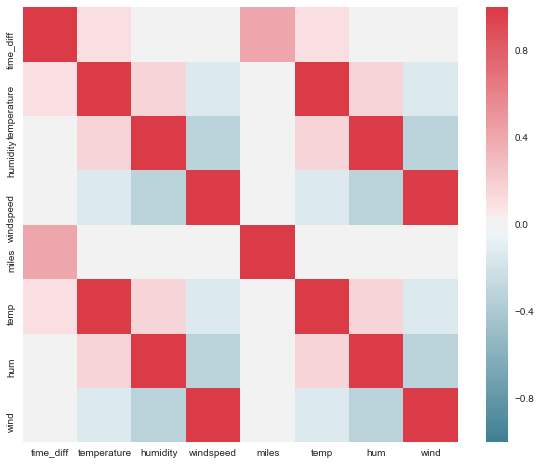

In [31]:
# Checking the correlations between continuous variables
corr = bikeshare_machine.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [32]:
# Turn categorical data into dummy variables. Dropping first dummy for the category variables that have 2 labels
bikeshare_dummy = pd.get_dummies(bikeshare_machine, 
                                 columns=['member_type','holiday','work_day'], drop_first=True)
# Turning categorical data into dummy variables. Not dropping the first dummy for categorical data with more
# than 2 labels
bikeshare_dummy = pd.get_dummies(bikeshare_dummy, 
                                 columns=['start_station','end_station','season','month','weekday','weather_cat'])
bikeshare_dummy.head()

,time_diff,temperature,humidity,windspeed,miles,temp,hum,wind,member_type_Registered,holiday_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_cat_1,weather_cat_2,weather_cat_3
0,1.833,0.268333,0.918333,0.217646,0.238743,4.611651,91.8333,14.582282,1,0,...,0,0,0,0,1,0,0,0,0,1
1,3.317,0.268333,0.918333,0.217646,0.659533,4.611651,91.8333,14.582282,1,0,...,0,0,0,0,1,0,0,0,0,1
2,5.733,0.268333,0.918333,0.217646,0.691996,4.611651,91.8333,14.582282,1,0,...,0,0,0,0,1,0,0,0,0,1
3,8.700,0.268333,0.918333,0.217646,1.453796,4.611651,91.8333,14.582282,1,0,...,0,0,0,0,1,0,0,0,0,1
4,7.850,0.268333,0.918333,0.217646,1.351053,4.611651,91.8333,14.582282,1,0,...,0,0,0,0,1,0,0,0,0,1


In [33]:
bikeshare_dummy = shuffle(bikeshare_dummy)
bikeshare_dummy.head()

,time_diff,temperature,humidity,windspeed,miles,temp,hum,wind,member_type_Registered,holiday_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_cat_1,weather_cat_2,weather_cat_3
1129134,58.733,0.361739,0.476957,0.222587,0.000000,9.001733,47.6957,14.913329,0,0,...,1,0,0,0,0,0,0,1,0,0
511888,7.900,0.700000,0.761250,0.083962,1.068832,24.900000,76.1250,5.625487,1,0,...,0,0,0,0,0,1,0,1,0,0
103049,2.617,0.233333,0.498750,0.157963,0.321521,2.966651,49.8750,10.583521,1,0,...,0,0,0,0,0,0,1,0,1,0
514655,5.767,0.684167,0.771667,0.210833,0.815689,24.155849,77.1667,14.125811,1,0,...,0,0,0,0,1,0,0,0,1,0
59176,8.417,0.182222,0.577778,0.195683,0.668981,0.564434,57.7778,13.110761,1,0,...,0,0,1,0,0,0,0,1,0,0


### Model 1 - Remove Some Variables that are correlated

In [45]:
# Leave workday, drop weekdays, leave season, drop month
# Workday overlaps with workday/not workday and months overlap with seasons
remove_cols = ['weekday_0', 'weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6', 
              'month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9',
              'month_10','month_11','month_12','temperature','humidity','windspeed', 'time_diff']
X1 = np.matrix(bikeshare_dummy.drop(remove_cols, 1))
y1 = bikeshare_dummy['time_diff']

In [46]:
# Split the data into training and testing sets and check the shape
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state=17)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((914885, 276), (304962, 276), (914885,), (304962,))

In [47]:
# Fit model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
pred1 = model1.predict(X1_test)
cvscores_model1 = cross_val_score(model1, X1_train, y1_train, cv=5)
model1_r = model1.score(X1_test, y1_test)
model1_mse = mean_squared_error(y1_test, pred1)
model1_rmse = np.sqrt(model1_mse)
adjustedr1 = 1 - (1-model1_r)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)

In [51]:
cvscores_model1, model1_r, adjustedr1, model1_mse, model1_rmse

(array([  4.19396866e-01,  -2.82700217e+11,   4.11246539e-01,
          4.11587802e-01,   4.16526712e-01]),
 0.41135502686758668,
 0.41082180070750485,
 80.740536544241991,
 8.9855738016134499)

In [52]:
model1_sm = sm.OLS(y1_train, X1_train).fit()
model1_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              time_diff   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     2379.
Date:                Mon, 04 Dec 2017   Prob (F-statistic):               0.00
Time:                        21:23:50   Log-Likelihood:            -3.3039e+06
No. Observations:              914885   AIC:                         6.608e+06
Df Residuals:                  914612   BIC:                         6.612e+06
Df Model:                         272                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.1505      0.013    459.917      0.000       6.124       6.177
x2             0.0554      0.002     28.128      0.000       0.052       0.059
x3             0.0004      0.001      0.434      0.664      -0.001       0.002
x4            -0.0065      0.002     -3.189      0.001      -0.010      -0.002
x5           -11.3548      0.027   -414.275      0.000     -11.409     -11.301
x6            -0.5937      0.064     -9.230      0.000      -0.720      -0.468
x7            -1.7137      0.022    -77.872      0.000      -1.757      -1.671
x8            -0.8807      0.214     -4.107      0.000      -1.301      -0.460
x9            -1.2635      0.113    -11.220      0.000      -1.484      -1.043
x10            3.4519      0.116     29.813      0.000       3.225       3.679
x11           -1.3109      0.247     -5.309      0.000      -1.795      -0.827
x12           -2.0374      0.117    -17.464      0.000      -2.266      -1.809
x13            1.5209      0.310      4.905      0.000       0.913       2.129
x14           -0.4821      0.319     -1.511      0.131      -1.107       0.143
x15           -1.8230      0.124    -14.712      0.000      -2.066      -1.580
x16           -1.0997      0.125     -8.799      0.000      -1.345      -0.855
x17            0.2437      0.118      2.070      0.038       0.013       0.474
x18            3.2032      0.131     24.514      0.000       2.947       3.459
x19           -1.1639      0.138     -8.432      0.000      -1.434      -0.893
x20            1.1251      0.121      9.315      0.000       0.888       1.362
x21           -2.4905      0.111    -22.518      0.000      -2.707      -2.274
x22           -1.4872      0.113    -13.161      0.000      -1.709      -1.266
x23           -0.8939      0.106     -8.466      0.000      -1.101      -0.687
x24           -1.4838      0.103    -14.402      0.000      -1.686      -1.282
x25           -2.3863      0.141    -16.936      0.000      -2.662      -2.110
x26           -1.8252      0.227     -8.042      0.000      -2.270      -1.380
x27            2.9394      0.233     12.595      0.000       2.482       3.397
x28           -0.5174      0.100     -5.184      0.000      -0.713      -0.322
x29           -2.2455      0.276     -8.139      0.000      -2.786      -1.705
x30           -2.2838      0.109    -20.995      0.000      -2.497      -2.071
x31           -0.7265      0.102     -7.142      0.000      -0.926      -0.527
x32            0.0994      0.126      0.789      0.430      -0.147       0.346
x33           -0.5167      0.112     -4.622      0.000      -0.736      -0.298
x34           -0.1445      0.209     -0.691      0.490      -0.554       0.265
x35            1.2420      0.146      8.492      0.000       0.955       1.529
x36           -0.5714      0.192     -2.981      0.003      -0.947      -0.196
x3

### Model 2 - Try reverse of Model 1

In [65]:
# Drop workday, leave weekdays, drop season, leave month
# Workday overlaps with workday/not workday and months overlap with seasons
remove_cols = ['work_day_1','season_1', 'season_2', 'season_3', 'season_4',
               'temperature','humidity','windspeed', 'time_diff']
X2 = bikeshare_dummy.drop(remove_cols, 1)
y2 = bikeshare_dummy['time_diff']

In [66]:
# Split the data into training and testing sets and check the shape
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state=17)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((914885, 290), (304962, 290), (914885,), (304962,))

In [67]:
# Fit model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
pred2 = model2.predict(X2_test)
cvscores_model2 = cross_val_score(model2, X2_train, y2_train, cv=5)
model2_r = model2.score(X2_test, y2_test)
model2_mse = mean_squared_error(y2_test, pred2)
model2_rmse = np.sqrt(model2_mse)
adjustedr2 = 1 - (1-model2_r)*(len(y2_test)-1)/(len(y2_test)-X2_test.shape[1]-1)

In [70]:
cvscores_model2, model2_r, adjustedr2, model2_mse, model2_rmse

(array([  4.19951961e-01,  -4.36506620e+11,   4.11768429e-01,
          4.12278706e-01,   4.17275309e-01]),
 0.41198515859795792,
 0.41142545877747416,
 80.654105543679833,
 8.9807630824824578)

In [71]:
# Use statsmodel to check the statistical side of the model
model2_sm = sm.OLS(y2_train, X2_train).fit()
model2_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              time_diff   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     2277.
Date:                Mon, 04 Dec 2017   Prob (F-statistic):               0.00
Time:                        21:48:37   Log-Likelihood:            -3.3034e+06
No. Observations:              914885   AIC:                         6.607e+06
Df Residuals:                  914599   BIC:                         6.611e+06
Df Model:                         285                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
miles                                                                 6.1456      0.013    459.690      0.000       6.119       6.172
temp                                                                  0.0616      0.003     21.594      0.000       0.056       0.067
hum                                                                  -0.0047      0.001     -4.647      0.000      -0.007      -0.003
wind                                                                 -0.0164      0.002     -7.872      0.000      -0.020      -0.012
member_type_Registered                                              -11.3244      0.027   -412.954      0.000     -11.378     -11.271
holiday_1                                                             0.9492      0.066     14.395      0.000       0.820       1.078
start_station_10th & Monroe St NE                                    -0.9067      0.214     -4.230      0.000      -1.327      -0.487
start_station_10th & U St NW                                         -1.2854      0.113    -11.422      0.000      -1.506      -1.065
start_station_10th St & Constitution Ave NW                           3.4158      0.116     29.520      0.000       3.189       3.643
start_station_11th & H St NE                                         -1.2592      0.247     -5.102      0.000      -1.743      -0.775
start_station_11th & Kenyon St NW                                    -2.0442      0.117    -17.534      0.000      -2.273      -1.816
start_station_12th & Army Navy Dr                                     1.4989      0.310      4.837      0.000       0.891       2.106
start_station_12th & Newton St NE                                    -0.5175      0.319     -1.623      0.105      -1.142       0.107
start_station_13th & D St NE                                         -1.8399      0.124    -14.858      0.000      -2.083      -1.597
start_station_13th & H St NE                                         -1.1292      0.125     -9.040      0.000      -1.374      -0.884
start_station_13th St & New York Ave NW                               0.2177      0.118      1.850      0.064      -0.013       0.448
start_station_14th & D St NW / Ronald Reagan Building                 3.1919      0.131     24.443      0.000       2.936       3.448
start_station_14th & D St SE                                         -1.1803      0.138     -8.555      0.000      -1.451      -0.910
start_station_14th & G St NW                                          1.0972      0.121      9.090      0.000       0.861       1.334
start_station_14th & Harvard St NW                                   -2.5078      0.111    -22.689      0.000      -2.724      -2.291
s

### Model 3 - All variables

In [72]:
# Keep all but time_diff
X3 = bikeshare_dummy.drop('time_diff', 1)
y3 = bikeshare_dummy['time_diff']

In [73]:
# Split the data into training and testing sets and check the shape
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25, random_state=17)
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

((914885, 298), (304962, 298), (914885,), (304962,))

In [74]:
# Fit model
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
pred3 = model3.predict(X3_test)
cvscores_model3 = cross_val_score(model3, X3_train, y3_train, cv=5)
model3_r = model3.score(X3_test, y3_test)
model3_mse = mean_squared_error(y3_test, pred3)
model3_rmse = np.sqrt(model3_mse)
adjustedr3 = 1 - (1-model3_r)*(len(y3_test)-1)/(len(y3_test)-X3_test.shape[1]-1)

In [76]:
cvscores_model3, model3_r, adjustedr3, model3_mse, model3_rmse

(array([  4.19972558e-01,  -2.28038770e+09,   4.11745927e-01,
          4.12267901e-01,   4.17295263e-01]),
 0.41199570925313755,
 0.41142056465519639,
 80.652658380111006,
 8.9806825119314286)

In [77]:
# Use statsmodel to check the statistical side of the model
model3_sm = sm.OLS(y3_train, X3_train).fit()
model3_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              time_diff   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     2253.
Date:                Mon, 04 Dec 2017   Prob (F-statistic):               0.00
Time:                        21:56:19   Log-Likelihood:            -3.3034e+06
No. Observations:              914885   AIC:                         6.607e+06
Df Residuals:                  914596   BIC:                         6.611e+06
Df Model:                         288                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
temperature                                                           3.0019      0.025    120.807      0.000       2.953       3.051
humidity                                                          -4.685e-05   1.01e-05     -4.636      0.000   -6.67e-05    -2.7e-05
windspeed                                                            -0.0002   3.12e-05     -8.020      0.000      -0.000      -0.000
miles                                                                 6.1456      0.013    459.699      0.000       6.119       6.172
temp                                                                 -0.0026      0.003     -0.875      0.381      -0.008       0.003
hum                                                                  -0.0047      0.001     -4.636      0.000      -0.007      -0.003
wind                                                                 -0.0167      0.002     -8.020      0.000      -0.021      -0.013
member_type_Registered                                              -11.3235      0.027   -412.876      0.000     -11.377     -11.270
holiday_1                                                             3.6280      0.057     63.546      0.000       3.516       3.740
work_day_1                                                            2.6865      0.037     72.964      0.000       2.614       2.759
start_station_10th & Monroe St NE                                    -0.9993      0.214     -4.659      0.000      -1.420      -0.579
start_station_10th & U St NW                                         -1.3765      0.113    -12.200      0.000      -1.598      -1.155
start_station_10th St & Constitution Ave NW                           3.3243      0.116     28.657      0.000       3.097       3.552
start_station_11th & H St NE                                         -1.3507      0.247     -5.470      0.000      -1.835      -0.867
start_station_11th & Kenyon St NW                                    -2.1358      0.117    -18.276      0.000      -2.365      -1.907
start_station_12th & Army Navy Dr                                     1.4050      0.310      4.532      0.000       0.797       2.013
start_station_12th & Newton St NE                                    -0.6109      0.319     -1.915      0.055      -1.236       0.014
start_station_13th & D St NE                                         -1.9311      0.124    -15.561      0.000      -2.174      -1.688
start_station_13th & H St NE                                         -1.2213      0.125     -9.757      0.000      -1.467      -0.976
start_station_13th St & New York Ave NW                               0.1258      0.118      1.067      0.286      -0.105       0.357
s

### Model 4 - Ridge with Round 1

In [80]:
# Fit the model with 5 folds
ridge1 = RidgeCV(alphas=np.logspace(0.0001, 20.0, 35), cv=5, fit_intercept=True)
ridge1.fit(X1_train, y1_train)

RidgeCV(alphas=array([  1.00023e+00,   3.87554e+00,   1.50164e+01,   5.81831e+01,
         2.25439e+02,   8.73498e+02,   3.38450e+03,   1.31137e+04,
         5.08111e+04,   1.96875e+05,   7.62823e+05,   2.95567e+06,
         1.14522e+07,   4.43732e+07,   1.71931e+08,   6.66170e+08,
         2.58118e+09,   1...6,   1.14509e+17,   4.43681e+17,   1.71911e+18,
         6.66094e+18,   2.58088e+19,   1.00000e+20]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [ ]:
ridge1.alpha_

15.016361190550022

In [ ]:
pred4 = ridge1.predict(X1_test)
cvscores_ridge1 = cross_val_score(ridge1, X1_train, y1_train, cv=5)
ridge1_r = ridge1.score(X1_test, y1_test)
ridge1_mse = mean_squared_error(y1_test, pred4)
ridge1_rmse = np.sqrt(ridge1_mse)
adjustedr4 = 1 - (1-ridge1_r)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)

In [ ]:
cvscores_ridge1, ridge1_r, ridge1_mse, ridge1_rmse, adjustedr4